In [3]:
import tensorflow as tf 
import numpy as np 
import math
import os 
from PIL import Image 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from scipy.stats import skew, boxcox
 

 

# Outlier Pursuit Model with L1 norm

In [15]:
lamlist1=[0.01,0.02,0.025,0.03,0.035,0.04] 
AUCL1=np.array([0.48594860591764616,0.4908969169805083,0.5652047900499914,0.5899452284901201,0.5781253490231819,0.556733299380358])
lamlist2=[0.01,0.02,0.03,0.04,0.07,0.10,0.13,0.15] 
PRL1=np.array([0.05844673241324096,0.05886611977402955,0.0871634627275134,0.07356476314945772,0.0669285735815957,0.06541674482064189,0.06455376442733599,0.06292849806018302])

AUCL10=np.max([AUCL1,1-AUCL1],axis=0) 
print(AUCL10)

[0.51405139 0.50910308 0.56520479 0.58994523 0.57812535 0.5567333 ]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


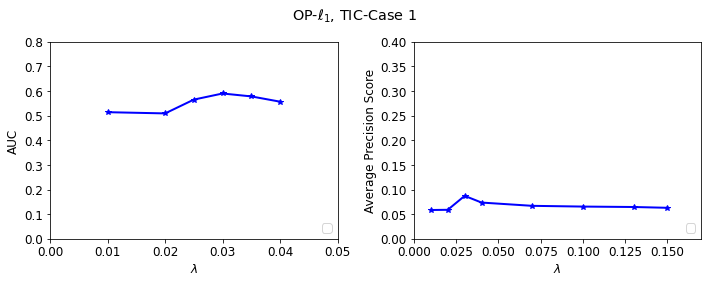

In [16]:
#title='Logistic Regression, TIC \n'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.title('AUC v.s. Ratio of Outliers')
axs[0].plot(lamlist1,AUCL10, '*-', color='b', lw=2,label='')#,label='{}ROC curve (area)'
axs[1].plot(lamlist2,PRL1, '*-', color='b', lw=2,label='')#,label='{}PRC curve (area)'
x=np.array([0.05,0.17])
y=np.array([0.8,0.4])
s=0
for ax, labels in zip(axs, (('$\lambda$', 'AUC'), ('$\lambda$', 'Average Precision Score'))):
    ax.set_xlim([0.0, x[s]])
    ax.set_ylim([0.0, y[s]])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.legend(loc="lower right")
    s=s+1 
plt.suptitle('OP-$\ell_1$, TIC-Case 1')
#plt.title('AUC v.s. Ratio of Outliers')
plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.92))
plt.savefig('TIC1RatioL1.jpg')
plt.show()

# Outlier Pursuit Model with Lp norm

In [17]:
lamlist1=[0.03]
plist1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98]

AUCLp=np.array([0.485929619056554,0.4859625668449198,0.4859480474805552,0.4859826705801938,0.48653049736641074,0.49555093169644254,0.5294916212098875
,0.5251670843776106,0.5566942087839921,0.5858111187058556,0.5875852733437872])
AUCLp0=np.max([AUCLp,1-AUCLp],axis=0)
print(AUCLp0)

[0.51407038 0.51403743 0.51405195 0.51401733 0.5134695  0.50444907
 0.52949162 0.52516708 0.55669421 0.58581112 0.58758527]


In [18]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCLp0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.51407038, 0.51403743, 0.51405195, 0.51401733, 0.5134695 ,
       0.50444907, 0.52949162, 0.52516708, 0.55669421, 0.58581112,
       0.58758527])]
[array([0.51407038, 0.51403743, 0.51405195, 0.51401733, 0.5134695 ,
       0.50444907, 0.52949162, 0.52516708, 0.55669421, 0.58581112,
       0.58758527])]


In [19]:
lamlist2=[0.01,0.03,0.04,0.07,0.10,0.13,0.15] # 
plist2=[0.7,0.75,0.8,0.85,0.9,0.95,0.98] 

PRLp=np.array([0.05843950144661745,0.058442151822535746,0.05845495391727429,0.05843953597681862,0.05845680231434354,0.058442845571683874,0.05845065521898238
,0.06263237501322845,0.06927272422750741,0.06302956846668378,0.06639743914318044,0.07347446067113361,0.09016267600758018
,0.08884959679351687,0.06326642730182587,0.06552122499922639,0.06688347276442633,0.06781548263686929,0.0685771608487685,0.06996645290939658
,0.071283238634019,0.06053070859823269,0.060219562669169724,0.06286595016342225,0.0641017419797693,0.0649418914037492
,0.06543077044842677,0.06633671444168668,0.0617985264041422,0.06111224150214426,0.06127530273564538,0.06097286051511241,0.06100287263657546
,0.0647587402778283,0.06581520786840964,0.06403179712764685,0.06187055377878626,0.061890327433170245,0.06170489907623787,0.06083500787248537
,0.06075047723523637,0.06299195943114184,0.060386048937334846,0.06043332473425987,0.061565347760413,0.06197460992933492,0.061747702024861545
,0.06165389534873397,0.061792995576127975])

In [20]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRLp[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.0584395 , 0.05844215, 0.05845495, 0.05843954, 0.0584568 ,
       0.05844285, 0.05845066]), array([0.06263238, 0.06927272, 0.06302957, 0.06639744, 0.07347446,
       0.09016268, 0.0888496 ]), array([0.06326643, 0.06552122, 0.06688347, 0.06781548, 0.06857716,
       0.06996645, 0.07128324]), array([0.06053071, 0.06021956, 0.06286595, 0.06410174, 0.06494189,
       0.06543077, 0.06633671]), array([0.06179853, 0.06111224, 0.0612753 , 0.06097286, 0.06100287,
       0.06475874, 0.06581521]), array([0.0640318 , 0.06187055, 0.06189033, 0.0617049 , 0.06083501,
       0.06075048, 0.06299196]), array([0.06038605, 0.06043332, 0.06156535, 0.06197461, 0.0617477 ,
       0.0616539 , 0.061793  ])]
[array([0.0584395 , 0.05844215, 0.05845495, 0.05843954, 0.0584568 ,
       0.05844285, 0.05845066]), array([0.06263238, 0.06927272, 0.06302957, 0.06639744, 0.07347446,
       0.09016268, 0.0888496 ]), array([0.06326643, 0.06552122, 0.06688347, 0.06781548, 0.06857716,
       0.06996645, 0.07128324])

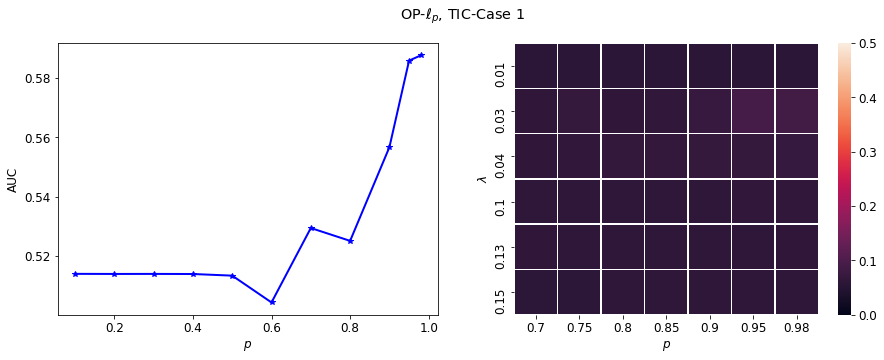

In [32]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

#ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax[0].plot(plist1,AUCLp0, '*-', color='b', lw=2,label='$\lambda=0.03$')
ax[0].set(xlabel='$p$', ylabel='AUC')
#ax[0].set_xlabel('$p$')
#ax[0].set_ylabel('$\lambda$')

ax2 = sns.heatmap(np.delete(fig2,3,0), linewidth=0.5, xticklabels=plist2, yticklabels=np.delete(np.sort(ss2),3,0), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$p$', ylabel='$\lambda$')
plt.suptitle('OP-$\ell_p$, TIC-Case 1')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('TIC1RatioLp.jpg')
plt.show()

# Outlier Pursuit Model with ETP

In [43]:
lamlist1=[0.023,0.025,0.028,0.03,0.033,0.035]
plist1=[0.0000001] 

AUCETP=np.array([0.5236660054771509,0.5652505818914487,0.5915228132720393,0.5899413194304834,0.5848762950156139,0.5781169724668176])
AUCETP0=np.max([AUCETP,1-AUCETP],axis=0)
print(AUCETP0)

[0.52366601 0.56525058 0.59152281 0.58994132 0.5848763  0.57811697]


In [44]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCETP0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.52366601]), array([0.56525058]), array([0.59152281]), array([0.58994132]), array([0.5848763]), array([0.57811697])]
[array([0.52366601]), array([0.56525058]), array([0.59152281]), array([0.58994132]), array([0.5848763]), array([0.57811697])]


In [45]:
lamlist2=[0.023,0.025,0.028,0.03,0.033,0.035] # 
plist2=[0.0000001,0.00001,0.001,0.1,0.000001,0.0001,0.01,1] 

PRETP=np.array([0.061641884763834795,0.061947576626222606,0.0924642523504238,0.0584393164083787,0.06826332909404118,0.06923730674902445,0.0924739691292712
,0.05821420189132611,0.08274071078556663,0.0835636341781411,0.09247779709895035,0.0581683918885883,0.08716757393863347,0.08756917768292341
,0.09246042330056838,0.05828271768307462,0.08704675158032761,0.08710232815640247,0.07926245975121318,0.05791100604108814
,0.082723703350881,0.08269037737799748,0.06972923082275104,0.05752477786851707,0.06167436577443966,0.06706169650571464,0.057823993105688976,0.0584433194621371,0.06834308873018624,0.08036469674472609,0.057852269193466976
,0.058448272521173385,0.08276456898237679,0.08887198920847823,0.057878750063412976,0.05844447459892168,0.08715853129386877,0.09063548713421654
,0.06611880114569625,0.058443821274156045,0.08703887229906934,0.08784957411672811,0.06615092917036461,0.05844509275676042,0.08271261290257494
,0.0828150859715208,0.06614050708613776,0.05844598960137242])

In [46]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRETP[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)
fig22=[]
aa2=plist2.copy()
data=np.transpose(data)
for ind in np.argsort(aa2):
    fig22.append(data[ind])
fig22=np.transpose(fig22)
print(fig22)

[array([0.06164188, 0.06194758, 0.09246425, 0.05843932, 0.06826333,
       0.06923731, 0.09247397, 0.0582142 ]), array([0.08274071, 0.08356363, 0.0924778 , 0.05816839, 0.08716757,
       0.08756918, 0.09246042, 0.05828272]), array([0.08704675, 0.08710233, 0.07926246, 0.05791101, 0.0827237 ,
       0.08269038, 0.06972923, 0.05752478]), array([0.06167437, 0.0670617 , 0.05782399, 0.05844332, 0.06834309,
       0.0803647 , 0.05785227, 0.05844827]), array([0.08276457, 0.08887199, 0.05787875, 0.05844447, 0.08715853,
       0.09063549, 0.0661188 , 0.05844382]), array([0.08703887, 0.08784957, 0.06615093, 0.05844509, 0.08271261,
       0.08281509, 0.06614051, 0.05844599])]
[array([0.06164188, 0.06194758, 0.09246425, 0.05843932, 0.06826333,
       0.06923731, 0.09247397, 0.0582142 ]), array([0.08274071, 0.08356363, 0.0924778 , 0.05816839, 0.08716757,
       0.08756918, 0.09246042, 0.05828272]), array([0.08704675, 0.08710233, 0.07926246, 0.05791101, 0.0827237 ,
       0.08269038, 0.06972923, 0.05

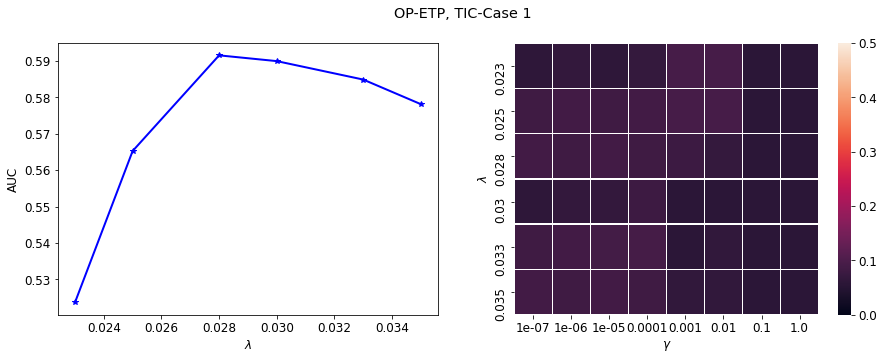

In [48]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

#ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax[0].plot(lamlist1,AUCETP0, '*-', color='b', lw=2,label='$\gamma=0.0000001$')
ax[0].set(xlabel='$\lambda$', ylabel='AUC')
#ax[0].set_xlabel('$p$')
#ax[0].set_ylabel('$\lambda$')

ax2 = sns.heatmap(fig22, linewidth=0.5, xticklabels=np.sort(plist2), yticklabels=np.sort(ss2), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$\gamma$', ylabel='$\lambda$')
plt.suptitle('OP-ETP, TIC-Case 1')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('TIC1RatioETP.jpg')
plt.show()